# Using NLTK

Let's Check first that its only positive and Negative Reviews

In [5]:
import pandas as pd

file_path_new = '/content/dev.tsv'

new_data = pd.read_csv(file_path_new, sep='\t', header=None)

new_data.columns = ['review', 'label']

label_counts = new_data['label'].value_counts()

label_counts

,count
label,
1,444
0,428


Label the data to positive and negative reviews

In [30]:
import pandas as pd

file_path='/content/dev.tsv'

data=pd.read_csv(file_path,sep='\t',header=None)

data.columns=['review','label']

label_mapping={0:'negative',1:'positive'}

data['label']=data['label'].map(label_mapping)

labeled_data=list(data.itertuples(index=False,name=None))

print(labeled_data[:5])

[('one long string of cliches', 'negative'), ("if you 've ever entertained the notion of doing what the title of this film implies , what sex with strangers actually shows may put you off the idea forever", 'negative'), ('k 19 exploits our substantial collective fear of nuclear holocaust to generate cheap hollywood tension', 'negative'), ("it 's played in the most straight faced fashion , with little humor to lighten things up", 'negative'), ('there is a fabric of complex ideas here , and feelings that profoundly deepen them', 'positive')]


In [9]:
!pip install nltk
!pip install scikit-learn

## Download necessary NLTK resources

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC


nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Preprocessing the labeled data

In [11]:

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

preprocessed_data = []
labels = []

for review, label in labeled_data:
    tokens = word_tokenize(review.lower())
    filtered_tokens = [token for token in tokens if token not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    preprocessed_tweet = ' '.join(lemmatized_tokens)

    preprocessed_data.append(preprocessed_tweet)
    labels.append(label)

In [14]:
# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data, labels, test_size=0.2, random_state=42)


In [15]:
# Vectorize the preprocessed data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)


In [16]:
# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vectors, y_train)


SVC(kernel='linear')

In [17]:
# Evaluate the trained classifier on the testing set
y_pred = svm_classifier.predict(X_test_vectors)
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

    negative       0.67      0.66      0.66        87
    positive       0.67      0.68      0.67        88

    accuracy                           0.67       175
   macro avg       0.67      0.67      0.67       175
weighted avg       0.67      0.67      0.67       175



In [13]:
file_path = '/content/test.tsv'
data = pd.read_csv(file_path, sep='\t')

data.head()

unseen_reviews = data.iloc[:, 0]

unseen_reviews.head()


,"no movement , no yuks , not much of anything"
0,"a gob of drivel so sickly sweet , even the eag..."
1,"gangs of new york is an unapologetic mess , wh..."
2,"we never really feel involved with the story ,..."
3,this is one of polanski 's best films
4,take care of my cat offers a refreshingly diff...


In [19]:
analyzer = SentimentIntensityAnalyzer()

for review in unseen_reviews:
    sentiment_scores = analyzer.polarity_scores(review)
    print(f"Review: {review}")
    print(f"Sentiment Scores: {sentiment_scores}")
    print()

Streaming output truncated to the last 5000 lines.
Sentiment Scores: {'neg': 0.093, 'neu': 0.799, 'pos': 0.108, 'compound': 0.0987}

Review: a film so tedious that it is impossible to care whether that boast is true or not
Sentiment Scores: {'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.7184}

Review: and in this regard , on guard delivers
Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Review: something the true film buff will enjoy
Sentiment Scores: {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.7184}

Review: the result is solemn and horrifying , yet strangely detached
Sentiment Scores: {'neg': 0.635, 'neu': 0.365, 'pos': 0.0, 'compound': -0.7717}

Review: a gentle , compassionate drama about grief and healing
Sentiment Scores: {'neg': 0.241, 'neu': 0.301, 'pos': 0.459, 'compound': 0.4404}

Review: the story itself is uninteresting , and the songs are painfully undistinguished they might be giants ' so to be one of us may be the most tuneless tun

In [37]:
import pandas as pd

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def classify_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'


# Create an empty dictionary to store the reviews, sentiment scores and the sentiment
reviews_data = {
    'Review': [],
    # 'Sentiment Scores':[],
    'Sentiment': []
}

# Loop through each review and analyze the sentiment
for review in unseen_reviews:
    sentiment_scores = analyzer.polarity_scores(review)

    # Classify the sentiment based on the compound score
    classified_sentiment = classify_sentiment(sentiment_scores['compound'])

    # Append the review, sentiment scores, and classified sentiment to the dictionary
    reviews_data['Review'].append(review)
    # reviews_data['Sentiment Scores'].append(sentiment_scores)
    reviews_data['Sentiment'].append(classified_sentiment)

# Convert the dictionary to a DataFrame
reviews_df = pd.DataFrame(reviews_data)

# Display the resulting DataFrame
reviews_df


,Review,Sentiment
0,"a gob of drivel so sickly sweet , even the eag...",Positive
1,"gangs of new york is an unapologetic mess , wh...",Neutral
2,"we never really feel involved with the story ,...",Neutral
3,this is one of polanski 's best films,Positive
4,take care of my cat offers a refreshingly diff...,Positive
...,...,...
1815,"an often deadly boring , strange reading of a ...",Negative
1816,the problem with concept films is that if the ...,Negative
1817,"safe conduct , however ambitious and well inte...",Positive
1818,"a film made with as little wit , interest , an...",Positive


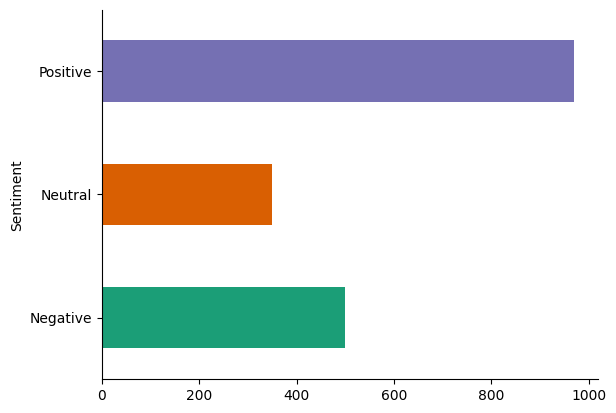

In [34]:
# @title Sentiment

from matplotlib import pyplot as plt
import seaborn as sns
reviews_df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#Using Bert PreInstalled from HuggingFace

##I've done this incase we need the reviews to be from 1 to 5

In [28]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch


# Load the pre-trained BERT model and tokenizer
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [29]:
tokens=tokenizer.encode('this is amazing',return_tensors='pt')
result=model(tokens)
result.logits
int(torch.argmax(result.logits))+1

5

In [41]:
import numpy as np
import pandas as pd

In [55]:
file_path='/content/dev.tsv'

datanew=pd.read_csv(file_path,sep='\t',header=None)

datanew.drop(columns=[1],inplace=True)

dataf=pd.DataFrame(datanew)

dataf.columns=['review']

dataf

,review
0,one long string of cliches
1,if you 've ever entertained the notion of doin...
2,k 19 exploits our substantial collective fear ...
3,it 's played in the most straight faced fashio...
4,"there is a fabric of complex ideas here , and ..."
...,...
867,something like scrubbing the toilet
868,"smart , provocative and blisteringly funny"
869,"this one is definitely one to skip , even for ..."
870,charles ' entertaining film chronicles seinfel...


In [43]:
def sentiment_score(review):
  tokens=tokenizer.encode(review,return_tensors='pt')
  result=model(tokens)
  return int(torch.argmax(result.logits))+1

In [54]:
sentiment_score(dataf['review'].iloc[4])

5

In [60]:
dataf['Sentiment']=dataf['review'].apply(lambda x:sentiment_score(x[:512]))

In [58]:
dataf

,review,Sentiment
0,one long string of cliches,1
1,if you 've ever entertained the notion of doin...,1
2,k 19 exploits our substantial collective fear ...,1
3,it 's played in the most straight faced fashio...,4
4,"there is a fabric of complex ideas here , and ...",5
...,...,...
867,something like scrubbing the toilet,2
868,"smart , provocative and blisteringly funny",5
869,"this one is definitely one to skip , even for ...",1
870,charles ' entertaining film chronicles seinfel...,4


In [62]:
file_path='/content/test.tsv'

datanewest=pd.read_csv(file_path,sep='\t',header=None)

datanewest.drop(columns=[1],inplace=True)

testframe=pd.DataFrame(datanewest)

testframe.columns=['review']

testframe

,review
0,"no movement , no yuks , not much of anything"
1,"a gob of drivel so sickly sweet , even the eag..."
2,"gangs of new york is an unapologetic mess , wh..."
3,"we never really feel involved with the story ,..."
4,this is one of polanski 's best films
...,...
1816,"an often deadly boring , strange reading of a ..."
1817,the problem with concept films is that if the ...
1818,"safe conduct , however ambitious and well inte..."
1819,"a film made with as little wit , interest , an..."


In [63]:
testframe['Sentiment']=testframe['review'].apply(lambda x:sentiment_score(x[:512]))

In [64]:
testframe

,review,Sentiment
0,"no movement , no yuks , not much of anything",1
1,"a gob of drivel so sickly sweet , even the eag...",1
2,"gangs of new york is an unapologetic mess , wh...",2
3,"we never really feel involved with the story ,...",2
4,this is one of polanski 's best films,5
...,...,...
1816,"an often deadly boring , strange reading of a ...",2
1817,the problem with concept films is that if the ...,2
1818,"safe conduct , however ambitious and well inte...",3
1819,"a film made with as little wit , interest , an...",5


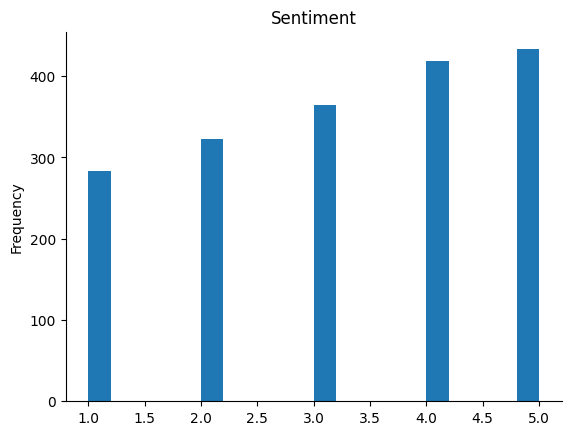

In [65]:
# @title Sentiment

from matplotlib import pyplot as plt
testframe['Sentiment'].plot(kind='hist', bins=20, title='Sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)